# SINDy-SHRED Tutorial on Sea Surface Temperature

In [1]:
%load_ext autoreload
%autoreload 2

#### Import Libraries

In [2]:
# PYSHRED
from pyshred import DataManager, SHRED, SHREDEngine, SINDy_Forecaster

# Other helper libraries
import matplotlib.pyplot as plt
from scipy.io import loadmat
import torch
import numpy as np

#### Load in SST Data

In [3]:
mat = loadmat("SST_data.mat")
sst_data = mat['Z'].T
sst_data = sst_data.reshape(1400, 180, 360)
sst_data.shape

(1400, 180, 360)

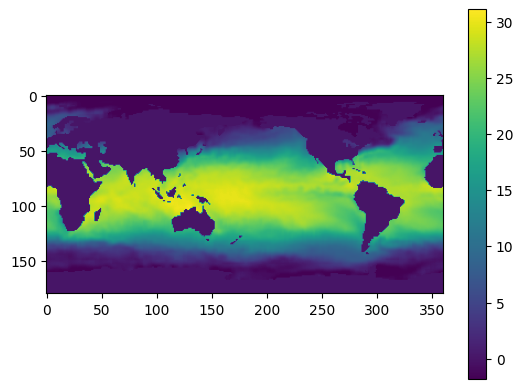

In [4]:
# Plotting a single frame
plt.figure()
plt.imshow(sst_data[0]) 
plt.colorbar()
plt.show()

#### Initialize Data Manager

In [5]:
manager = DataManager(
    lags = 52,
    train_size = 0.8,
    val_size = 0.1,
    test_size = 0.1,
)

#### Add datasets and sensors

In [6]:
manager.add_data(
    data = sst_data,
    id = "SST",
    random = 50,
    # mobile=,
    # stationary=,
    # measurements=,
    compress=False,
)

#### Analyze sensor summary

In [7]:
manager.sensor_summary_df

,data id,number,type,loc/traj
0,SST,0,stationary (random),"(75, 91)"
1,SST,1,stationary (random),"(90, 153)"
2,SST,2,stationary (random),"(65, 138)"
3,SST,3,stationary (random),"(154, 67)"
4,SST,4,stationary (random),"(172, 204)"
5,SST,5,stationary (random),"(49, 124)"
6,SST,6,stationary (random),"(110, 164)"
7,SST,7,stationary (random),"(164, 88)"
8,SST,8,stationary (random),"(96, 178)"
9,SST,9,stationary (random),"(128, 183)"


In [8]:
manager.sensor_measurements_df

data id,SST-0,SST-1,SST-2,SST-3,SST-4,SST-5,SST-6,SST-7,SST-8,SST-9,...,SST-40,SST-41,SST-42,SST-43,SST-44,SST-45,SST-46,SST-47,SST-48,SST-49
0,27.469999,29.429999,23.279999,0.00,-0.0,0.0,26.519999,-0.0,29.949999,18.47,...,-0.0,23.669999,13.52,-0.07,0.0,7.71,-1.42,-0.0,0.0,5.09
1,26.969999,29.659999,22.979999,0.05,-0.0,0.0,27.229999,-0.0,29.889999,18.51,...,-0.0,23.459999,13.38,-0.04,0.0,7.58,-1.20,-0.0,0.0,4.97
2,26.179999,29.749999,22.629999,0.01,-0.0,0.0,27.949999,-0.0,29.839999,19.14,...,-0.0,23.419999,12.65,-0.07,0.0,7.13,-1.05,-0.0,0.0,5.57
3,26.309999,29.199999,21.990000,-0.01,-0.0,0.0,27.829999,-0.0,29.649999,19.19,...,-0.0,23.029999,12.90,0.05,0.0,7.21,-0.75,-0.0,0.0,6.00
4,26.719999,29.119999,22.429999,-0.02,-0.0,0.0,27.679999,-0.0,29.169999,19.59,...,-0.0,23.219999,12.70,0.17,0.0,7.30,-0.77,-0.0,0.0,5.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,29.109999,29.909999,28.679999,-1.74,-0.0,0.0,24.329999,-0.0,29.749999,14.17,...,0.0,26.669999,21.35,-0.98,0.0,11.19,-1.47,-0.0,0.0,-0.54
1396,29.049999,30.049999,28.689999,-1.65,-0.0,0.0,25.209999,-0.0,29.739999,14.45,...,0.0,26.409999,21.20,-0.99,0.0,10.40,-1.30,-0.0,0.0,-0.34
1397,29.239999,30.269999,28.869999,-1.45,-0.0,0.0,24.659999,-0.0,29.929999,14.91,...,0.0,26.599999,19.85,-0.80,0.0,9.84,-1.28,-0.0,0.0,-0.49
1398,29.589999,30.329999,28.999999,-1.50,-0.0,0.0,24.879999,-0.0,29.839999,15.03,...,0.0,26.599999,18.45,-0.99,0.0,9.53,-1.30,-0.0,0.0,-0.84


#### Get train, validation, and test set

In [9]:
train_dataset, val_dataset, test_dataset= manager.prepare()

#### Initialize a latent forecaster

In [10]:
latent_forecaster = SINDy_Forecaster(poly_order=1, include_sine=True, dt=1/5)

#### Initialize SHRED

In [ ]:
shred = SHRED(sequence_model="GRU", decoder_model="MLP", latent_forecaster=latent_forecaster)

#### Fit SHRED

In [ ]:
val_errors = shred.fit(train_dataset=train_dataset, val_dataset=val_dataset, num_epochs=10, sindy_thres_epoch=20, sindy_regularization=1)
print('val_errors:', val_errors)

Fitting SindySHRED...
Epoch 1: Average training loss = 0.113462
Validation MSE (epoch 1): 0.035907
Epoch 2: Average training loss = 0.050084
Validation MSE (epoch 2): 0.017119
Epoch 3: Average training loss = 0.025530
Validation MSE (epoch 3): 0.017065
Epoch 4: Average training loss = 0.022404
Validation MSE (epoch 4): 0.015441
Epoch 5: Average training loss = 0.022002
Validation MSE (epoch 5): 0.014016
Epoch 6: Average training loss = 0.021343
Validation MSE (epoch 6): 0.013516
Epoch 7: Average training loss = 0.020509
Validation MSE (epoch 7): 0.013060
Epoch 8: Average training loss = 0.019463
Validation MSE (epoch 8): 0.012592
Epoch 9: Average training loss = 0.018733
Validation MSE (epoch 9): 0.012087
Epoch 10: Average training loss = 0.017903
Validation MSE (epoch 10): 0.011690
val_errors: [0.03590691 0.01711907 0.01706486 0.01544069 0.01401623 0.01351578
 0.01306047 0.01259177 0.01208725 0.01168976]


#### Evaluate SHRED

In [13]:
train_mse = shred.evaluate(dataset=train_dataset)
val_mse = shred.evaluate(dataset=val_dataset)
test_mse = shred.evaluate(dataset=test_dataset)
print(f"Train MSE: {train_mse:.3f}")
print(f"Val   MSE: {val_mse:.3f}")
print(f"Test  MSE: {test_mse:.3f}")

Train MSE: 0.010
Val   MSE: 0.012
Test  MSE: 0.017


#### SINDy Discovered Latent Dynamics

In [14]:
print(shred.latent_forecaster)

(x0)' = 0.008 1 + -0.047 x0 + -0.026 x1 + 0.006 x2
(x1)' = -0.041 1 + -0.174 x0 + 0.578 x1 + 0.588 x2
(x2)' = 0.144 1 + 0.080 x0 + -0.939 x1 + -0.593 x2


#### Initialize SHRED Engine for Downstream Tasks

In [15]:
engine = SHREDEngine(manager, shred)

#### Sensor Measurements to Latent Space

In [16]:
test_latent_from_sensors = engine.sensor_to_latent(manager.test_sensor_measurements)

#### Forecast Latent Space (No Sensor Measurements)

In [17]:
engine.model.latent_forecaster

SINDy_Forecaster()

In [18]:
val_latents = engine.sensor_to_latent(manager.val_sensor_measurements)
init_latents = val_latents[-1] # seed forecaster with final latent space from val
t = len(manager.test_sensor_measurements)
test_latent_from_forecaster = engine.forecast_latent(t=t, init_latents=init_latents)

#### Decode Latent Space to Full-State Space

In [19]:
test_prediction = engine.decode(test_latent_from_sensors) # latent space generated from sensor data
test_forecast = engine.decode(test_latent_from_forecaster) # latent space generated from latent forecasted (no sensor data)

Compare final frame in prediction and forecast to ground truth:

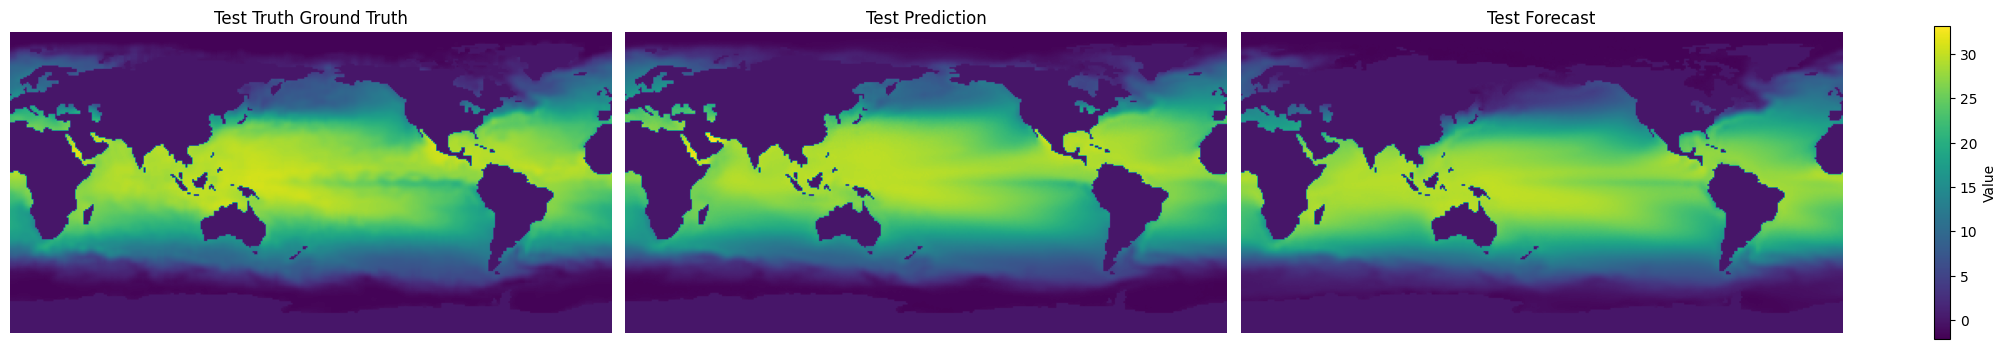

In [20]:
truth      = sst_data[-1]
prediction = test_prediction['SST'][t-1]
forecast   = test_forecast['SST'][t-1]

data   = [truth, prediction, forecast]
titles = ["Test Truth Ground Truth", "Test Prediction", "Test Forecast"]

vmin, vmax = np.min([d.min() for d in data]), np.max([d.max() for d in data])

fig, axes = plt.subplots(1, 3, figsize=(20, 4), constrained_layout=True)

for ax, d, title in zip(axes, data, titles):
    im = ax.imshow(d, vmin=vmin, vmax=vmax)
    ax.set(title=title)
    ax.axis("off")

fig.colorbar(im, ax=axes, label="Value", shrink=0.8)

#### Evaluate MSE on Ground Truth Data

In [21]:
# Train
t_train = len(manager.train_sensor_measurements)
train_Y = {'SST': sst_data[0:t_train]}
train_error = engine.evaluate(manager.train_sensor_measurements, train_Y)

# Val
t_val = len(manager.test_sensor_measurements)
val_Y = {'SST': sst_data[t_train:t_train+t_val]}
val_error = engine.evaluate(manager.val_sensor_measurements, val_Y)

# Test
t_test = len(manager.test_sensor_measurements)
test_Y = {'SST': sst_data[-t_test:]}
test_error = engine.evaluate(manager.test_sensor_measurements, test_Y)

print('---------- TRAIN ----------')
print(train_error)
print('\n---------- VAL   ----------')
print(val_error)
print('\n---------- TEST  ----------')
print(test_error)

---------- TRAIN ----------
              MSE      RMSE       MAE       R2
dataset                                       
SST      0.617007  0.785498  0.426965  0.41722

---------- VAL   ----------
              MSE      RMSE       MAE        R2
dataset                                        
SST      0.744356  0.862761  0.459704 -0.394776

---------- TEST  ----------
              MSE      RMSE       MAE        R2
dataset                                        
SST      1.229534  1.108844  0.622832 -0.556659
